We have the following regular expressions:
1: "a*",
2: "ab*",
3: "a?b*",
4: "ab",
5: "a*/b*",
6: "a*/b*/c",
7: "a/b/c",
8: "a/b*/c",
9: "(a | b | c)*", 
10: "(a | b |c)/b*"

And we instantiate two data constraint into the regular expressions

ABS 

In [1]:
queries =  {
    1: "a*",
    2: "ab*",
    3: "a?b*",
    4: "ab",
    5: "a*/b*",
    6: "a*/b*/c",
    7: "a/b/c",
    8: "a/b*/c",
    9: "(a | b | c)*", 
    10: "(a | b |c)/b*"
}

import pickle 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker
def slice_def(s:str) -> list[int]:
    count = 0
    counts = []
    for line in s:
            if "unknown" in line:  # Check for exact "start"
                if count:  # Save previous section
                    counts.append(count)
                count = 0  # Start a new section
            if "assert" in line:
                count = count + 1
    if count:  # Add the last section
            counts.append(count)
    return counts


def slice_log(p):
    with open(p, 'r', encoding='utf-8') as file:
        results = []
        current_section = []        
        for line in file:
            if "start" in line:  # Check for exact "start"
                if current_section:  # Save previous section
                    res = slice_def(current_section)
                    results.append(res)
                else:
                    pass 
                current_section = []  # Start a new section
            current_section.append(line)
        
        if current_section:  # Add the last section
                    res = slice_def(current_section)
                    results.append(res)
                    return results
        
import pandas as pd
import seaborn as sns 
def plot_boxplot_with_seaborn(data_dict, title, name="fig", log=True):
    # 将字典数据转换为长格式的DataFrame
    data_list = []
    for group, values in data_dict.items():
        for value in values:
            data_list.append({"Query": group, "Exploration Steps": value})
    
    df = pd.DataFrame(data_list)
    # 使用seaborn绘制箱线图
    plt.figure(figsize=(10, 6))
    ax = sns.dogplot(x="Exploration Steps", y="Query", data=df)
    if log:
        ax.set_xscale("log")
    ax.set_ylabel("Query", rotation=0, fontsize=14, labelpad=20)

    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(f'figure/{name}.svg', format='svg', dpi=1200, bbox_inches='tight')
    plt.show()


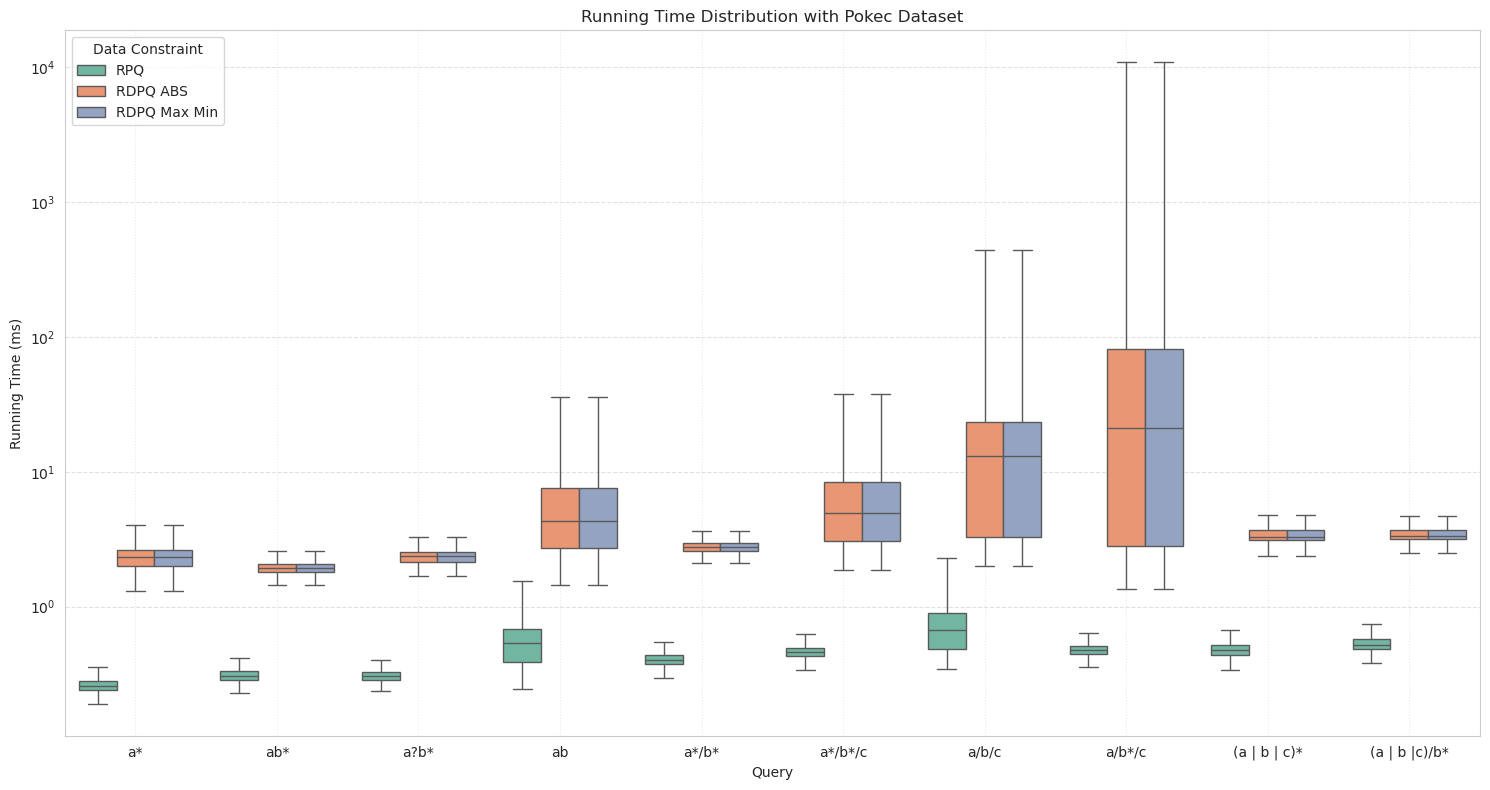

In [5]:
import pickle 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
with open("pokec/pokec_static.pkl","rb+") as f:
    data_ytb = pickle.loads(f.read()) 

data_groups = []
for i in range(10):  # Q1-Q10
    id = 0
    for dtype in ["RPQ", "RDPQ ABS", "RDPQ Max Min"]:  # 3 种数据类型
        data = list(map(lambda x: x, data_ytb[i*3 + id][2])) # 乘1000转换为ms
        id = id + 1
        data_groups.append((f"{queries[i+1]}", dtype, data))
# 转换为 DataFrame
df_list = []
for group, dtype, values in data_groups:
    for v in values:
        df_list.append((group, dtype, v))
df = pd.DataFrame(df_list, columns=["Query", "Data Constraint", "Running Time"])

# 计算每组数据的平均值
mean_values = df.groupby(["Query", "Data Constraint"])["Running Time"].mean().reset_index()

# 设置绘图风格
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# **改回线性坐标**
plt.yscale("log")  # 移除对数坐标

# 绘制箱线图
ax = sns.boxplot(x="Query", y="Running Time", hue="Data Constraint", data=df, palette="Set2", showfliers=False)


# **调整 Y 轴单位（毫秒）**
plt.ylabel("Running Time (ms)")
# **✅ 增加 Y 轴刻度**
y_min, y_max = df["Running Time"].min(), df["Running Time"].max()
# plt.yticks(np.arange(0, 8, step=100))  # 这里 10 表示 1.0s（因为单位是 0.1s）

# **✅ 调整 Y 轴 Label 位置（上方 & 水平）**
ax.set_ylabel("Running Time (ms)")  # 水平显示
# ax.yaxis.set_label_position("right")  # 让 Label 移到 Y 轴的顶部
# ax.yaxis.set_label_coords(1.02, 1.02)  # 让 Label 上移一点
# plt.yticks(np.arange(0, 8, step=0.5))


# 调整图例
plt.legend(title="Data Constraint", loc="upper left")
# **✅ 增加网格**
ax.yaxis.grid(True, linestyle="--", alpha=0.6)  # Y 轴添加虚线网格
ax.xaxis.grid(True, linestyle="dotted", alpha=0.4)  # X 轴网格更柔和
# 添加标题
plt.title("Running Time Distribution with Pokec Dataset")

# 旋转 X 轴标签
# plt.xticks(rotation=45)

# **自动调整布局，防止标签重叠**
plt.tight_layout()
plt.savefig('figure/pokec-time.svg', format='svg', dpi=1200, bbox_inches='tight')

# 显示图表
plt.show()


In [39]:
log = slice_log("icij-leak/z3_debug.log")
data_icij = log[1:]
id = []
for i in range(10):
    id.append(f"{queries[i+1]} ABS")
    id.append(f"{queries[i+1]} Max Min")
avg_formula_icij = {id[i]:data_icij[i*10000:i*10000+9999] for i in range(20)}
explore_steps_icij = {id[i]:list(map(lambda x : len(x), data_icij[i*10000:i*10000+9999])) for i in range(20)}

In [17]:
log

[[],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],

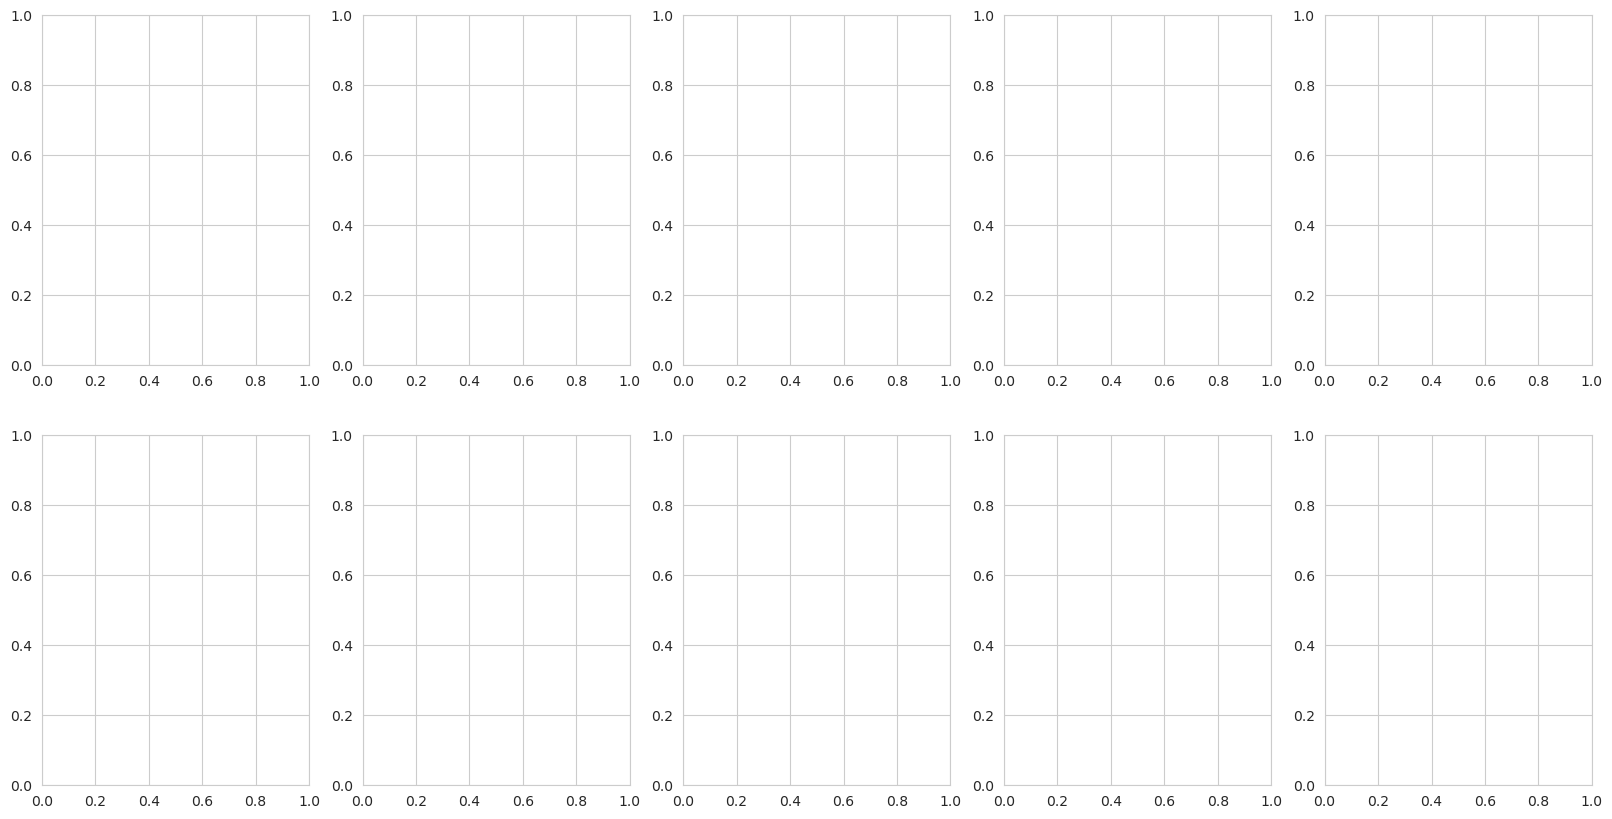

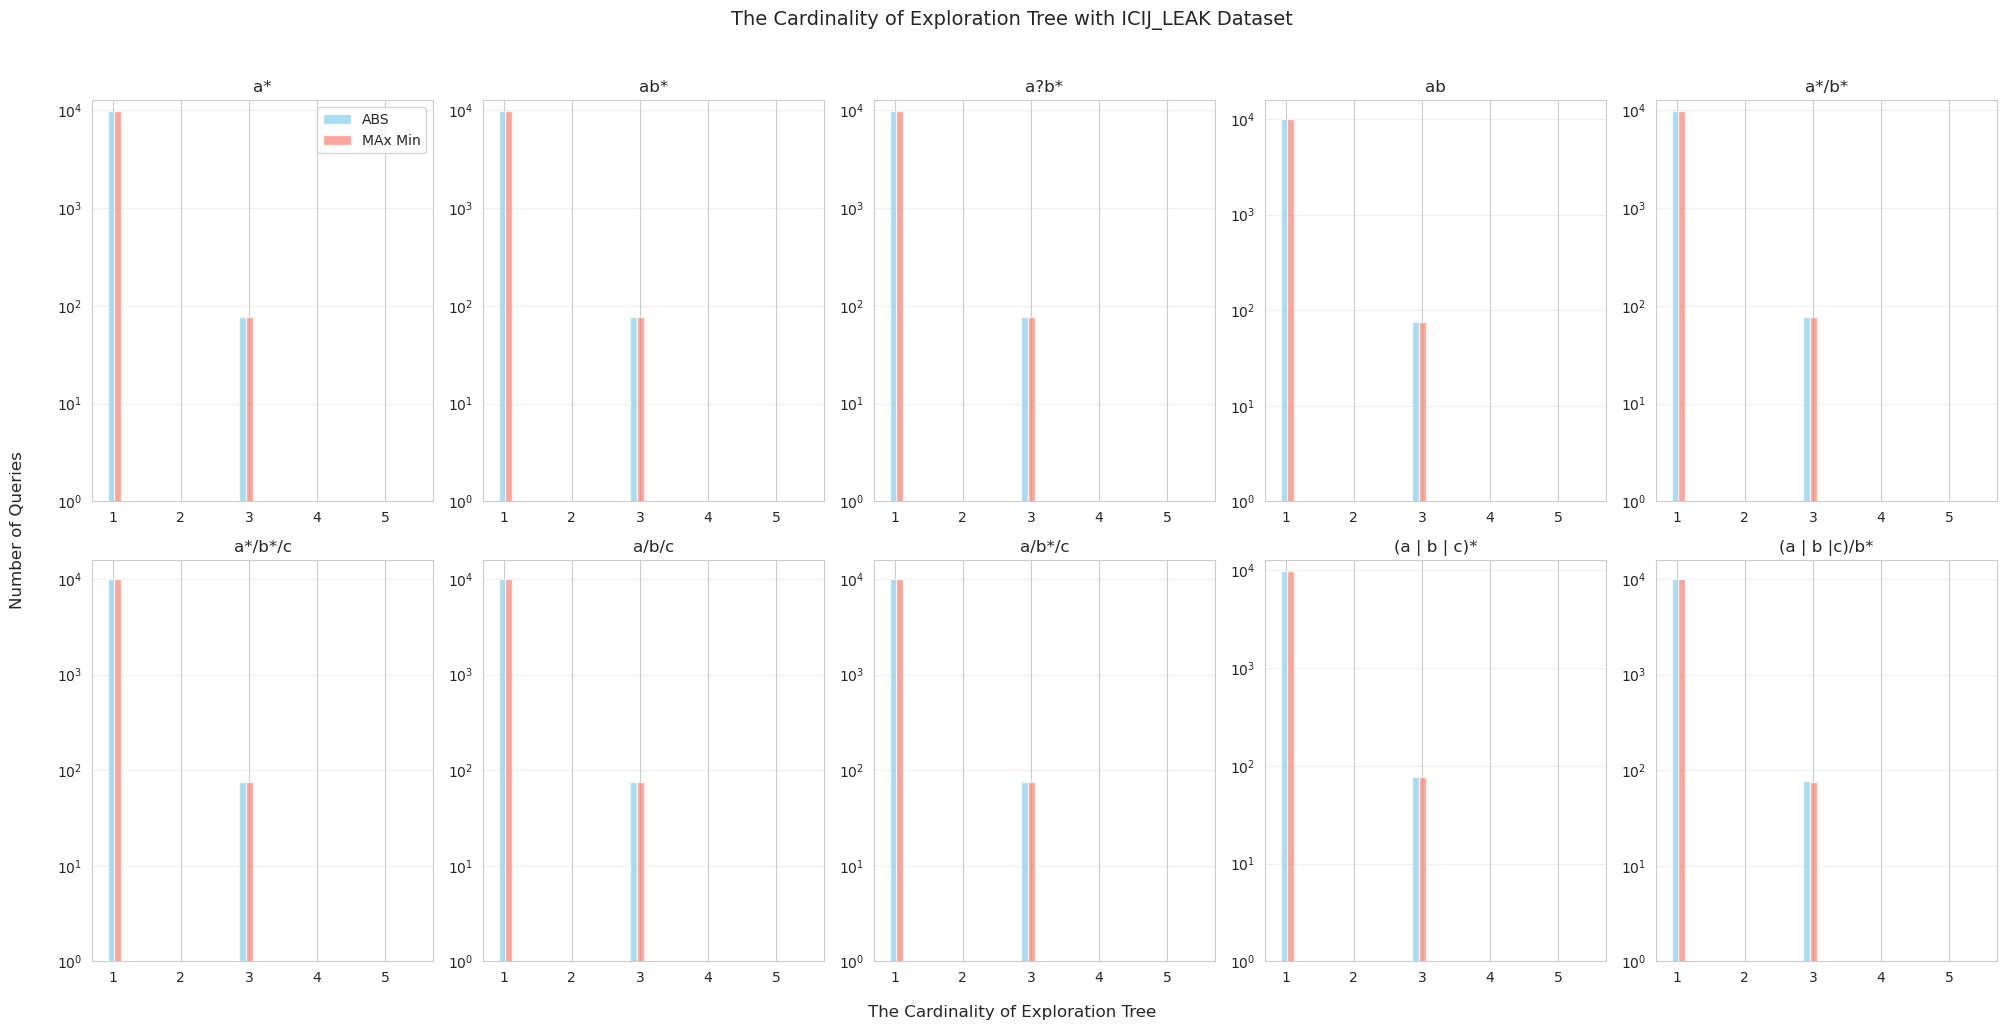

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 自动分类数据
max_data = {k: v for k, v in explore_steps_icij.items() if k.endswith("ABS") and len(v) != 0}
maxmin_data = {k: v for k, v in explore_steps_icij.items() if k.endswith("Min") and len(v) != 0}

# 设置随机种子保证可重复性
np.random.seed(42)

# 创建示例数据 - 10组，每组2类型
data = []
for i in range(10):
    group_name = f'{queries[i+1]}'
    type_a = max_data[f"{queries[i+1]} ABS"]  # 类型A数据
    type_b = maxmin_data[f"{queries[i+1]} Max Min"]
    data.append((group_name, type_a, type_b))
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# 创建子图
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# 计算全局bins范围（线性坐标）
all_values = np.concatenate([type_a for _, type_a, _ in data] + [type_b for _, _, type_b in data])
linear_bins = np.linspace(all_values.min()*0.9, all_values.max()*1.1, 20)

for i, (ax, (name, type_a, type_b)) in enumerate(zip(axes, data)):
    # 绘制直方图（不堆叠）
    ax.hist([type_a, type_b], bins=linear_bins, 
            color=['skyblue', 'salmon'], alpha=0.7,
            label=['ABS', 'MAx Min'])
    
    # 仅设置Y轴为对数坐标
    ax.set_yscale('log')
    
    # 设置Y轴最小值为1（避免log(0)问题）
    ax.set_ylim(bottom=1)
    
    # 添加标题和网格
    ax.set_title(name)
    ax.grid(True, axis='y', alpha=0.3)
    
    # 只在第一个子图添加图例
    if i == 0:
        ax.legend()

fig.supxlabel('The Cardinality of Exploration Tree')
fig.supylabel('Number of Queries', x = -0.001)
# 添加整体标题和调整布局

fig.suptitle('The Cardinality of Exploration Tree with ICIJ_LEAK Dataset', y=1.02, fontsize=14)
plt.tight_layout()

plt.savefig('figure/icij-step.svg', format='svg', dpi=1200, bbox_inches='tight')

plt.show()